In [1]:
import pandas as pd
import numpy as np 
import glob 
import warnings 
from scipy.stats import norm
from IPython.display import display, HTML
import scipy
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
sns.set()
from datetime import datetime as dt
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
# %config InlineBackend.figure_format = 'svg'

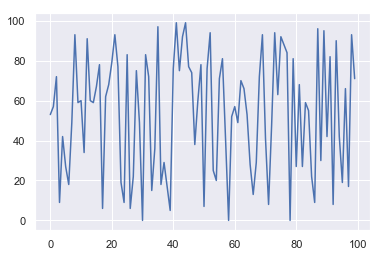

In [2]:
plt.plot(np.random.randint(100,size=(100,1)))
plt.show()

In [3]:
results = pd.read_csv('epl/results.csv')

In [4]:
results.head(10)

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.00,1.00,D,2006-2007
1,Arsenal,Aston Villa,1.00,1.00,D,2006-2007
2,Everton,Watford,2.00,1.00,H,2006-2007
3,Newcastle United,Wigan Athletic,2.00,1.00,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.00,0.00,H,2006-2007
5,Reading,Middlesbrough,3.00,2.00,H,2006-2007
6,West Ham United,Charlton Athletic,3.00,1.00,H,2006-2007
7,Bolton Wanderers,Tottenham Hotspur,2.00,0.00,H,2006-2007
8,Manchester United,Fulham,5.00,1.00,H,2006-2007
9,Chelsea,Manchester City,3.00,0.00,H,2006-2007


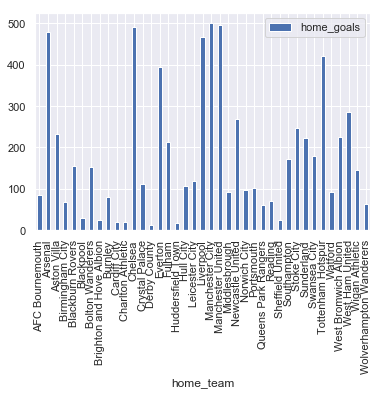

In [5]:
results.groupby('home_team').agg({'home_goals':'sum'}).plot(kind='bar')

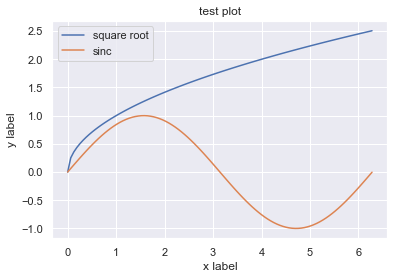

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 6.28, 100)

plt.plot(x, x**0.5, label='square root')
plt.plot(x, np.sin(x), label='sinc')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("test plot")

plt.legend()

plt.show(block=True)
plt.interactive(False)